In [19]:
import os
from pathlib import Path
from dotenv import load_dotenv
import psycopg2

load_dotenv()

True

In [20]:
# Берём переменные из .env
DB_HOST = os.getenv("POSTGRES_HOST")
DB_PORT = os.getenv("POSTGRES_PORT")
DB_NAME = os.getenv("POSTGRES_DB")
DB_USER = os.getenv("POSTGRES_USER")
DB_PASSWORD = os.getenv("POSTGRES_PASSWORD")

In [21]:
def get_db_connection():
    if None in (DB_HOST, DB_PORT, DB_NAME, DB_USER):
        raise ValueError("Одна из переменных окружения не задана!")
    conn = psycopg2.connect(
        host=DB_HOST,
        port=DB_PORT,
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD
    )
    return conn

conn = get_db_connection()

In [22]:
def load_sql(filename):
    sql_dir = Path.cwd().parent / "sql"
    return (sql_dir / filename).read_text(encoding="utf-8")


In [66]:
sql_files = [
    "avg_median_purchase.sql",
    "total_count.sql",
    "top_spent_passanger.sql", 
    "top_nulls.sql",
    "top_alcohol_spent.sql",
    "survived_no_purchase_stats.sql",
    "survival_stats.sql",
    "purchases_below_0.sql",
    "nulls_count.sql",
    "no_purchase_passanger.sql",
    "lifeboat_status_count.sql",
    "difference_pclass.sql",
    "category_sum.sql", 
    "category_spent.sql",
    "category_avg_spent.sql"
]   



In [77]:
import pandas as pd

dfs = {}

for file in sql_files:
    query = load_sql(file)   
    name = file.replace(".sql", "")
    dfs[name] = pd.read_sql_query(query, conn)



C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\3200380590.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[name] = pd.read_sql_query(query, conn)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\3200380590.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[name] = pd.read_sql_query(query, conn)


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
type(dfs)


dict

In [81]:
dfs = {}
for sql_file in sql_files:
    sql_query = load_sql(sql_file)      
    table_name = sql_file.replace(".sql", "")
    dfs[table_name] = pd.read_sql_query(sql_query, conn)
    dfs[table_name]
dfs = {}
for file in sql_files:
    query = load_sql(file)
    name = file.replace(".sql", "")
    dfs[name]= pd.read_sql_query(query,conn)
    query = load_sql(file)
    name = file.replace(".sql", "")
   


C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\3562334220.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[table_name] = pd.read_sql_query(sql_query, conn)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\3562334220.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[table_name] = pd.read_sql_query(sql_query, conn)
C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\3562334220.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[name]= pd.read_sql_query(query,conn)
C:\Users\Акылай\AppData\Local\Temp\ipyk

In [82]:
plots = {
    "survival_stats": {
        "x": "Survived",
        "y": "count",
        "title": "Выживаемость пассажиров",
        "kind": "bar"
        },
    "category_sum": {
        "x": "category",
        "y": "total_amount",
        "title": "Сумма покупок по категориям",
        "kind": "bar"
        },
    "avg_median_purchase": {
        "kind": "grouped"
        }
}


C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\1244281083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cfg["x"], y=cfg["y"], data=df, palette="viridis")
C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\1244281083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cfg["x"], y=cfg["y"], data=df, palette="viridis")


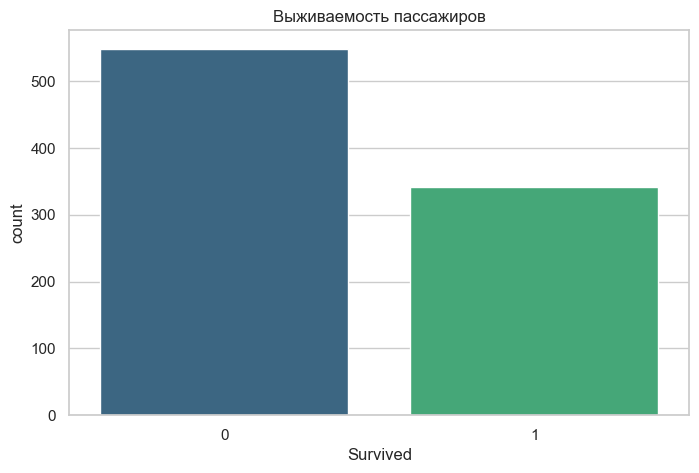

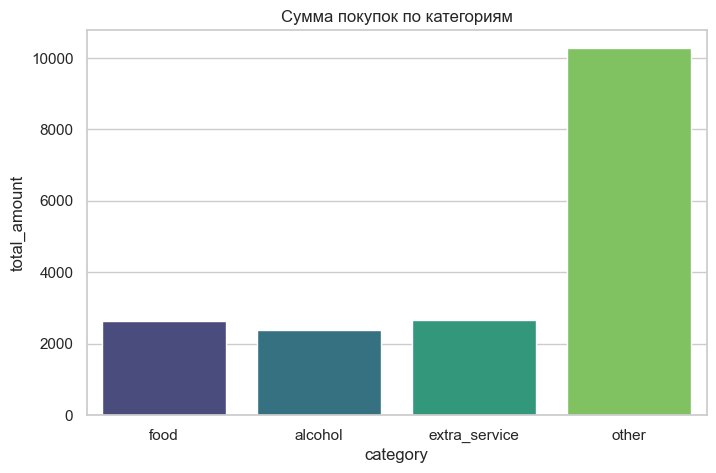

<Figure size 800x500 with 0 Axes>

In [96]:
for name, cfg in plots.items():
    df = dfs[name]
    
    plt.figure(figsize=(8,5))
    
    if cfg["kind"] == "bar":
        sns.barplot(x=cfg["x"], y=cfg["y"], data=df, palette="viridis")
        plt.title(cfg["title"])
        plt.xticks(rotation=0)
        
    elif cfg["kind"] == "grouped":
        df_melted = df.melt(
            id_vars="PassengerId",
            value_vars=["avg_amount", "median_amount"],
            var_name="metric",
            value_name="amount"
        )
        


C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\635794102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="total_spent", data=df, palette="Dark2_r")


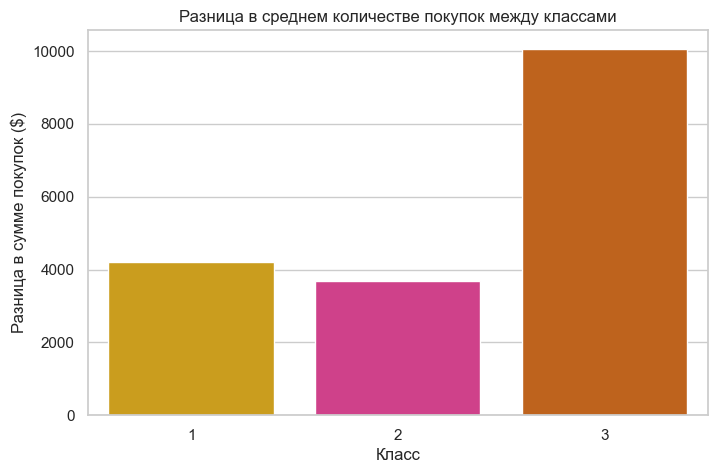

In [95]:
df= dfs["difference_pclass"]
plt.figure(figsize=(8,5))
sns.barplot(x="Pclass", y="total_spent", data=df, palette="Dark2_r")
plt.title("Разница в среднем количестве покупок между классами")
plt.xlabel("Класс")
plt.ylabel("Разница в сумме покупок ($)")
plt.show()


C:\Users\Акылай\AppData\Local\Temp\ipykernel_21844\1998777442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="column_name", y="null_count", data=df, palette="magma")


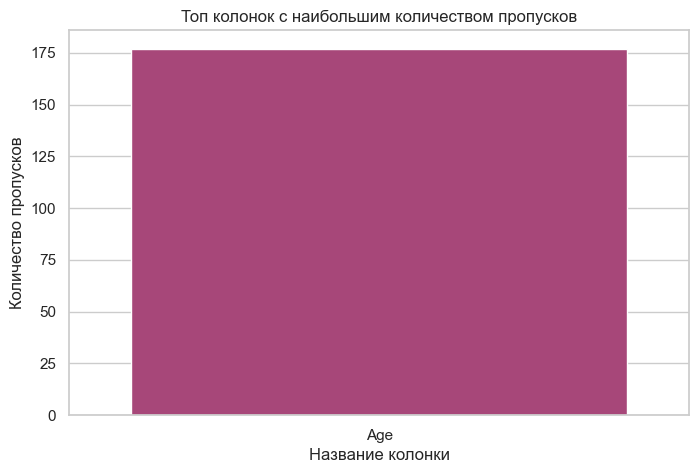

In [99]:
df = dfs["top_nulls"]
plt.figure(figsize=(8,5))
sns.barplot(x="column_name", y="null_count", data=df, palette="magma")
plt.title("Топ колонок с наибольшим количеством пропусков")
plt.xlabel("Название колонки")
plt.ylabel("Количество пропусков")
plt.xticks(rotation=0)
plt.show()